# Training GalaxyZoo Hyperspectral Images with Convolutional Neural Networks

## 1. Description
Each image in this demo has 5 channels which correspond to the **Ultraviolet ('u'), Green ('g'), Red ('r'), Near Infrared ('i'), and Infrared ('z')** wavelengths. 

The images vary in dimension and contain human-generated labels (votes) on whether each galaxy belongs to the classes: 'ellipse', 'clockwise spiral', 'anti-clockwise spiral', 'edge-on disk', 'don't know', and 'merger'.

These labels are represented by the label vector **['p_el', 'p_cw', 'p_acw', 'p_edge', 'p_dk', 'p_mg']** in the dataset and in the visualizations.


To begin, let's look at the number of images contained in this dataset and the largest dimension.

In [1]:
%load_ext autoreload 
%autoreload 2
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

imgdir = './data/'
gsum = 0
count = 0
largest_dims = 0
for file in os.listdir(imgdir):
    if file.endswith('.hdf5'):
        fh5 = h5py.File(imgdir+file,'r')
        dset_names = list(fh5.keys())

        #print('All keys in file = ', dset_names[1])
        sum = 0
        for name in dset_names:
            img = fh5[name]
            largest_dims = max(img.shape[-1], largest_dims)
            count += 1

if gsum == 0:
    print('All images in directory: ', imgdir, ' are square')
print('There are ', count, ' images in this directory')
print('Largest image dimension is ', largest_dims, 'x', largest_dims)

All images in directory:  ./data/  are square
There are  2000  images in this directory
Largest image dimension is  293 x 293


## 2. Visualize the data
Now that we know there are `2000` images in the demo dataset, visualize one of them using matplotlib.

The images throughtout will be shown in grayscale with all 5 channels. 

(5, 139, 139)


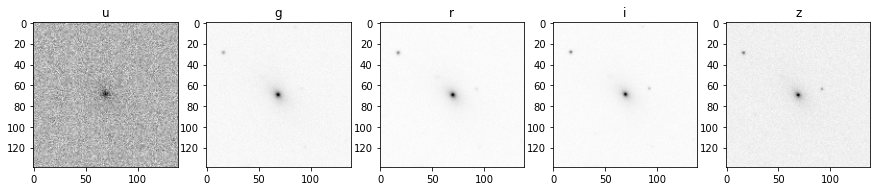

In [2]:
filters = ('u', 'g', 'r', 'i', 'z')

plt.figure(figsize=(15, 8))
print(img.shape)
for i, filt in enumerate(filters):
    plt.subplot(1, 5, i+1)
    plt.imshow(img[i, :, :], cmap=plt.cm.gray_r)
    plt.title(filt)

## 3. Train a Convolutional Neural Network

We will use a VGG network to learn the classification of this demo dataset.

<img src="assets/VGG.PNG" width="700" height="700" />

Note that because the GalaxyZoo dataset has images with a variety of dimensions, we will use an augmented VGG network. This network uses an **AdaptiveMaxPooling** layer before the classifier in order to ensure that the classifer can operate on predictable, fixed dimensions of data from the previous convolutional layers.



In [3]:
%load_ext autoreload 
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib notebook

import vgg
import torch
import torch.optim as optim
from torch.utils import data
import torch.nn.functional  as F
import torch.nn as nn
from HDF5Dataset import HDF5Dataset
import sys

vgg_network = vgg.vgg11()
optimizer = optim.SGD(vgg_network.parameters(), lr=.25e-6, momentum=0.9)
print('{}\n'.format(vgg_network))
print('{}\n'.format(optimizer))

label_keys = ['p_el', 'p_cw', 'p_acw', 'p_edge', 'p_dk', 'p_mg']
train_data = HDF5Dataset(imgdir, min_pixel_dims=0, max_pixel_dims=sys.maxsize, label_keys=label_keys)
data_loader = data.DataLoader(train_data, batch_size = 1, shuffle=True)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GalaxyZooVGG(
  (conv_layers): Sequential(
    (0): Conv2d(5, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(

## 4 Visualize the VGG Training Process

We will use mean-square error as our loss function and perform a softmax re-distribution of the CNN outputs to obtain a classification of the galaxies. This network and dataset is targetted towards running on the GPU, so it uses **PyTorch GPU offloading** during the training process.

By running the subsequent code, you can watch the training process of the VGG network for GalaxyZoo classification.


cuda:1


<IPython.core.display.Javascript object>


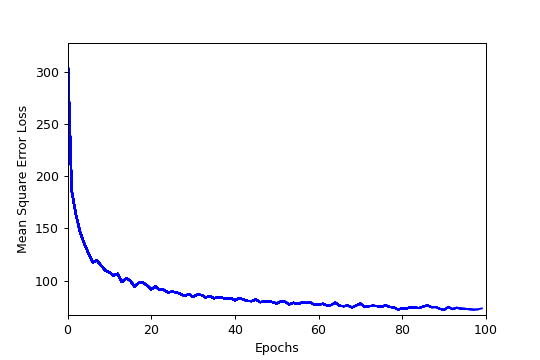

<IPython.core.display.Javascript object>


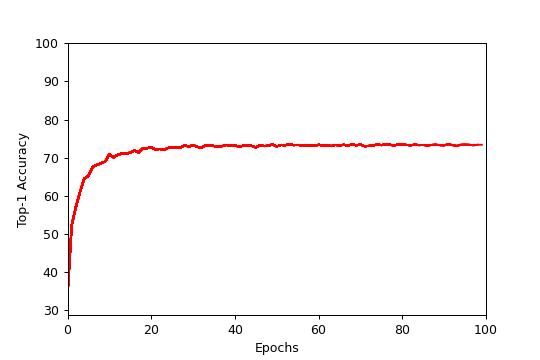

<IPython.core.display.Javascript object>


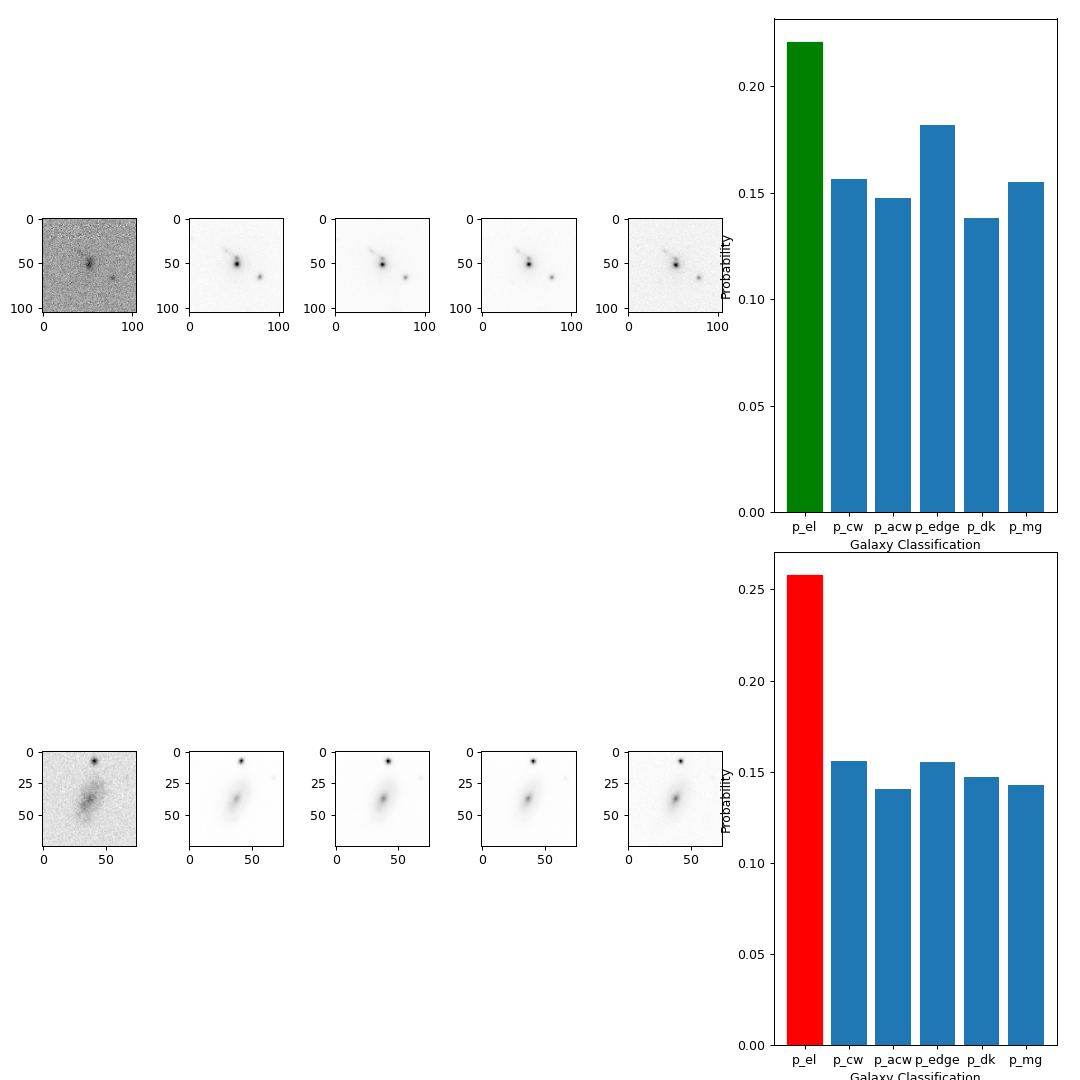

[1] loss: 322.5417976016179, training accuracy: 33.8%
[2] loss: 186.08804594934918, training accuracy: 52.3%
[3] loss: 163.45325962919742, training accuracy: 57.1%
[4] loss: 146.5466145495884, training accuracy: 61.05%
[5] loss: 135.518511463888, training accuracy: 64.5%
[6] loss: 126.17015896551311, training accuracy: 65.2%
[7] loss: 117.44929520087317, training accuracy: 67.6%
[8] loss: 119.28726236033253, training accuracy: 68.1%
[9] loss: 114.51079297903925, training accuracy: 68.55%
[10] loss: 109.87368270731531, training accuracy: 69.0%
[11] loss: 107.89438728243113, training accuracy: 70.9%
[12] loss: 104.83265401620883, training accuracy: 70.1%
[13] loss: 106.43124843481928, training accuracy: 70.75%
[14] loss: 98.56686969776638, training accuracy: 71.1%
[15] loss: 102.06836684443988, training accuracy: 71.05%
[16] loss: 99.838526195148, training accuracy: 71.35%
[17] loss: 94.32698202691972, training accuracy: 71.85%
[18] loss: 97.68370190187125, training accuracy: 71.4%
[19] 

In [5]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)
vgg_network.to(device)
loss_func = nn.MSELoss()
loss_history = []
accuracy_history = []

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_xlim(0,100)

fig2, ax2 = plt.subplots(1,1)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(0, 100)

fig3, ax3 = plt.subplots(2,6, figsize=(12,12), gridspec_kw={
                           'width_ratios': [1, 1, 1, 1, 1, 3]})
fig3.tight_layout()

for epoch in range(100):
    correct = np.zeros(len(label_keys))
    incorrect = np.zeros(len(label_keys))
    running_loss = 0.
    nitems = 0
    total_loss = 0.
    train_acc = 0.
    correct_prediction_img = None
    correct_probs = None
    incorrect_prediction_img = None
    incorrect_probs = None
    
    for i, data in enumerate(data_loader, 0):
        inputs, labels = data[0].float().to(device), data[1].float().to(device)            
        optimizer.zero_grad()
        outputs = vgg_network(inputs)
        loss = loss_func(outputs, labels)
        #outputs = F.log_softmax(outputs, dim=-1)
        pred = torch.argmax(F.softmax(outputs, dim=-1), dim=1)
        ground_truth = torch.argmax(labels, dim=1)
        train_acc += torch.sum(pred == ground_truth).item()
        if pred == ground_truth:
            correct[ground_truth.item()] += 1
            if correct_prediction_img is None:
                correct_prediction_img = inputs.cpu()[0]
                correct_probs = F.softmax(outputs, dim=-1).cpu()                
        else:
            incorrect[ground_truth.item()] += 1
            if incorrect_prediction_img is None:
                incorrect_prediction_img = inputs.cpu()[0]
                incorrect_probs = F.softmax(outputs, dim=-1).cpu()
        #loss = torch.mean(torch.sum(- labels * outputs, 1))
        loss.backward()
        optimizer.step()
        nitems += 1
        running_loss += loss.item()
    loss_history.append(running_loss)
    accuracy_history.append(100*(train_acc/len(train_data)))
    
    xdata = np.arange(0, len(loss_history))
    ax.plot(xdata, loss_history, 'b-')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Mean Square Error Loss')
    ax.set_ylim(min(loss_history)-5, max(loss_history)+5)
    fig.canvas.draw()
    ax2.plot(xdata, accuracy_history, 'r-')
    ax2.set_ylim(min(accuracy_history)-5, 100)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Top-1 Accuracy')
    fig2.canvas.draw()
    
    
    for i, filt in enumerate(filters):
        ax3[0][i].imshow(correct_prediction_img[i, :, :], cmap=plt.cm.gray_r)
    ax3[0][5].cla()
    barlist = ax3[0][5].bar(np.arange(0,6), correct_probs[0].detach().numpy())
    barlist[torch.argmax(correct_probs)].set_color('g')
    ax3[0][5].set_xticks(np.arange(0,6))
    ax3[0][5].set_xticklabels(label_keys)
    ax3[0][5].set(xlabel='Galaxy Classification', ylabel='Probability')
    for i, filt in enumerate(filters):
        ax3[1][i].imshow(incorrect_prediction_img[i, :, :], cmap=plt.cm.gray_r)
    ax3[1][5].cla()
    barlist = ax3[1][5].bar(np.arange(0, 6), incorrect_probs[0].detach().numpy())
    barlist[torch.argmax(incorrect_probs)].set_color('r')
    ax3[1][5].set_xticks(np.arange(0,6))
    ax3[1][5].set_xticklabels(label_keys)
    ax3[1][5].set(xlabel='Galaxy Classification', ylabel='Probability')
    fig3.canvas.draw()
    # Plot loss and accuracy
    print('[{}] loss: {}, training accuracy: {}%'.format(epoch+1, running_loss, 100*train_acc/len(train_data)))
